In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

In [2]:
label = open('data/train_label.pkl', 'rb')   
a = pickle.load(label) 
label.close
print("Number of labels :",len(a)) 

Number of labels : 8000


In [3]:
img = open('data/train_image.pkl', 'rb')   
image = pickle.load(img) 
img.close
print("length of image :",len(image))
# print(image[0])
print("length of image[0] :",len(image[0]))

length of image : 8000
length of image[0] : 784


In [4]:
new = np.reshape(image,(8000,28,28))
print("length of new :",len(new))
print("length of new[0] :",len(new[0]))

length of new : 8000
length of new[0] : 28


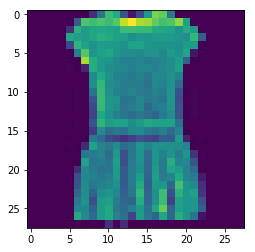

In [5]:
# plt.imshow(new[0])
# plt.imshow(new[2000])
plt.imshow(new[4000])
# plt.imshow(new[6000])
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    image, a, test_size=0.2,random_state=109)

SVM

In [10]:
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\envs\tf-keras\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

In [ ]:
clf = svm.SVC()
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, ’filename.pkl’)